In [1]:
#titanic
# TODO: create family size variable, use cabin to get floor
# TODO: feature scaling or mean normalization?
# TODO You can standardize the digits data by, for example, making use of the scale() method:

import pandas as pd
import numpy as np
#visualization
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
#import sklearn
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
# data dictionary

#Variable	Definition	Key
#survival	Survival	0 = No, 1 = Yes
#pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
#sex	Sex	
#Age	Age in years	
#sibsp	# of siblings / spouses aboard the Titanic	
#parch	# of parents / children aboard the Titanic	
#ticket	Ticket number	
#fare	Passenger fare	
#cabin	Cabin number	
#embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
titanic_df = pd.read_csv('C:/Users/blahjays/Documents/MachineLearning/Kaggle/train.csv')
titanic_test= pd.read_csv('C:/Users/blahjays/Documents/MachineLearning/Kaggle/test.csv')

In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# shape 891,12
print(titanic_df.shape)
# head
print(titanic_df.head(5))

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

In [6]:
# class distribution
print(titanic_df.groupby('Pclass').size())

Pclass
1    216
2    184
3    491
dtype: int64


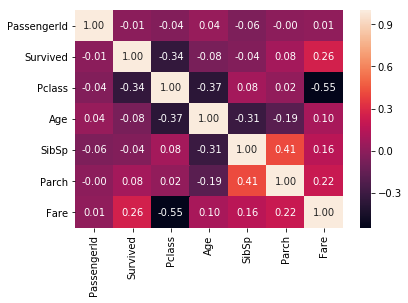

In [7]:
# Basic graphs to help understand data
# biggest correlations
# parch and sibsp are .41 positively correlated
#survived adn fare are .26 positively correlated
# sibsp and Age are .31 negatively correlated
# surived and pclass are -.34 negatively correlated
# pclass and age are .37 negatively correlated
# fare and pclass are .55 negatively correlated
        
sns.heatmap(titanic_df.corr(), annot=True, fmt=".2f")

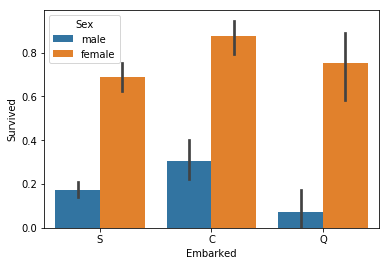

In [8]:
#compare Embarked and survival
#	C = Cherbourg, Q = Queenstown, S = Southampton
# passengers who embarked at Cherbourg appear more likely to have survived for some unexpected reason
# males who embarked at Queenstwon appear to have a lower chance of survival
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=titanic_df);


In [9]:
#titanic_df.groupby(['Embarked']).count()
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
titanic_df['Embarked'].isnull().sum()

2

In [11]:
# to analyze further, let's make embarked numeric
embark_mapping = {"S": 0, "C": 1, "Q": 2}
# there are 2 NA values and vast majority of users embarked at S, so just default those two users to S
titanic_df['Embarked'] = titanic_df['Embarked'].fillna("S")
titanic_test['Embarked'] = titanic_test['Embarked'].fillna("S")
titanic_df['Embarked'] = titanic_df['Embarked'].map(embark_mapping).astype(int)

titanic_test['Embarked'] = titanic_test['Embarked'].map(embark_mapping).astype(int)

titanic_df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0


In [12]:
# is this becuase there is a relationship between Embarked and Class?
# no - there is only a 6.2% correleation
corr = titanic_df.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.045702
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.010171
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.010171,-0.059961,-0.078665,0.062142,1.000000


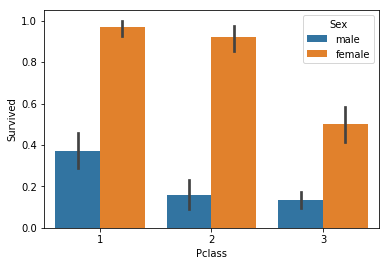

In [13]:
# compare Class and Surival by gender
# see upper class passengers more likely to survive and females much more liekly to surive in all classes
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df);

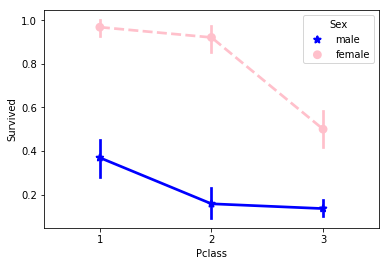

In [14]:
#plot pclass vs survival
# altnerative plot style
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df,
palette={"male": "blue", "female": "pink"},
markers=["*", "o"], linestyles=["-", "--"]);

In [15]:
#Scatter plot -- SLOW!
#sns.pairplot(titanic_df, hue="Age")

*************************************************
Start Feature Engineering section
*************************************************

In [16]:
#look at family size by combining siblings/spouse and parent/child columns
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']
titanic_test['FamilySize'] = titanic_test['SibSp'] + titanic_test['Parch']
titanic_df.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,0,0
816,817,0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,STON/O2. 3101290,7.9250,NaN,0,0
434,435,0,1,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.9000,E44,0,1
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,0,2
749,750,0,3,"Connaghton, Mr. Michael",male,31.0,0,0,335097,7.7500,NaN,2,0


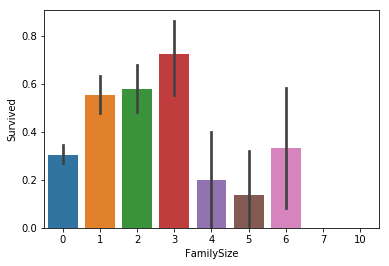

In [17]:
#plot impact of family size on survival
sns.barplot(x="FamilySize", y="Survived", data=titanic_df);

# seems best change of survival is with a small family 1-3


In [18]:
#extract Cabin info
# first lets examine some non null cabin data
titanic_df[titanic_df['Cabin'].notnull()]['Cabin'].count()
# have 204 rows with non null cabin data
# let's look at it
titanic_df[titanic_df['Cabin'].notnull()]['Cabin'].sample(10)

118        B58 B60
689             B5
679    B51 B53 B55
498        C22 C26
356            E33
515            D46
23              A6
527            C95
245            C78
669           C126
Name: Cabin, dtype: object

In [19]:
# most are in format C68, E46 etc
# see that we have some rows with multiple cabins: B51 B53 B55
# some rows only have Letter and no number

# let's try plotting Cabin vs survival rate
# plot NA vs Letter meaning
titanic_df['CabinLetter'] = titanic_df['Cabin'].str[0].fillna('ZZZ')
#titanic_df.sort_values(by=['CabinLetter'], axis=0)
titanic_df = titanic_df.sort_values(by='CabinLetter', ascending=True)
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,CabinLetter
445,446,1,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,0,2,A
209,210,1,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.0000,A31,1,0,A
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,1,0,A
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,1,1,A
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,0,0,A
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,0,0,A
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,0,0,A
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,0,0,A
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,0,0,A
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,1,1,A


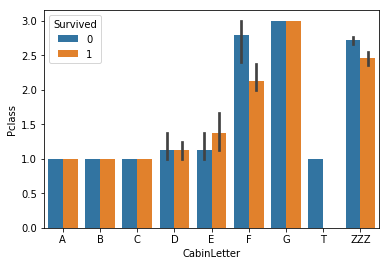

In [20]:
# plot relationship between Cabin floor, p place and survival
#TODO -- not a good plot
titanic_df.sort_values(by='CabinLetter', ascending=True)
#.sort_values(by='AgeBand', ascending=True)
sns.barplot(x="CabinLetter", y="Pclass", hue="Survived", data=titanic_df)
# Deck A is at top of ship

Decsion: don't believe cabin is a valuable field - highly correlated with class


In [21]:
# first pass at cleaning up data
#drop passengerid
#titanic_df = titanic_df.drop('PassengerId', axis=1).drop('Ticket',axis=1)
#titanic_df.head(5)

In [22]:
# convert sex to number, 0=male, 1=female
sex_mapping = {"male": 0, "female": 1}
titanic_df['Sex'] = titanic_df['Sex'].map(sex_mapping).astype(int)
titanic_test['Sex'] = titanic_test['Sex'].map(sex_mapping).astype(int)

In [23]:
# fill in missing ages
# first fill out titles
# add a computed title column
titanic_df['Title'] = titanic_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
titanic_test['Title'] = titanic_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(titanic_df['Title'], titanic_df['Sex'])
pd.crosstab(titanic_test['Title'], titanic_test['Sex'])

# replace rare titles
#titanic_df[titanic_df['Title'] == 'Mlle']
titanic_df['Title'] = titanic_df['Title'].replace('Mlle', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Ms', 'Miss')
titanic_df['Title'] = titanic_df['Title'].replace('Mme', 'Mrs')
titanic_df['Title'] = titanic_df['Title'].replace('Countess', 'Mrs')
titanic_df['Title'] = titanic_df['Title'].replace('Lady', 'Mrs')
titanic_df['Title'] = titanic_df['Title'].replace('Jonkheer', 'Mr')
titanic_df['Title'] = titanic_df['Title'].replace('Don', 'Mr')
titanic_df['Title'] = titanic_df['Title'].replace('Capt', 'Mr')
titanic_df['Title'] = titanic_df['Title'].replace('Col', 'Mr')
titanic_df['Title'] = titanic_df['Title'].replace('Major', 'Mr')
titanic_df['Title'] = titanic_df['Title'].replace('Sir', 'Mr')
titanic_df['Title'] = titanic_df['Title'].replace('Rev', 'Mr')



titanic_test['Title'] = titanic_test['Title'].replace('Mlle', 'Miss')
titanic_test['Title'] = titanic_test['Title'].replace('Ms', 'Miss')
titanic_test['Title'] = titanic_test['Title'].replace('Mme', 'Mrs')
titanic_test['Title'] = titanic_test['Title'].replace('Countess', 'Mrs')
titanic_test['Title'] = titanic_test['Title'].replace('Lady', 'Mrs')
titanic_test['Title'] = titanic_test['Title'].replace('Jonkheer', 'Mr')
titanic_test['Title'] = titanic_test['Title'].replace('Don', 'Mr')
titanic_test['Title'] = titanic_test['Title'].replace('Capt', 'Mr')
titanic_test['Title'] = titanic_test['Title'].replace('Col', 'Mr')
titanic_test['Title'] = titanic_test['Title'].replace('Major', 'Mr')
titanic_test['Title'] = titanic_test['Title'].replace('Sir', 'Mr')
titanic_test['Title'] = titanic_test['Title'].replace('Rev', 'Mr')
#now get average age for each title
#pd.crosstab(titanic_df['Title'], titanic_df['AgeBand'])


In [24]:
#now get average age for each title
title_avg_age_df = titanic_df[['Age' , 'Title']].groupby(['Title']).mean()
title_avg_age_df

,Age
Title,
Dr,42.000000
Master,4.574167
Miss,21.845638
Mr,32.891990
Mrs,35.873874


In [25]:
# convert title values to number
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5}

titanic_df['Title'] = titanic_df['Title'].map(title_mapping)
titanic_df['Title'] = titanic_df['Title'].fillna(0)
titanic_test['Title'] = titanic_test['Title'].map(title_mapping)
titanic_test['Title'] = titanic_test['Title'].fillna(0)

titanic_df.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,CabinLetter,Title
445,446,1,1,"Dodge, Master. Washington",0,4.0,0,2,33638,81.8583,A34,0,2,A,4
209,210,1,1,"Blank, Mr. Henry",0,40.0,0,0,112277,31.0000,A31,1,0,A,1
96,97,0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,34.6542,A5,1,0,A,1
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",0,49.0,1,0,PC 17485,56.9292,A20,1,1,A,1
806,807,0,1,"Andrews, Mr. Thomas Jr",0,39.0,0,0,112050,0.0000,A36,0,0,A,1


In [26]:
#now get average age for each title
title_avg_age_df = titanic_df[['Age' , 'Title']].groupby(['Title']).mean()
title_avg_age_df

,Age
Title,
1,32.891990
2,21.845638
3,35.873874
4,4.574167
5,42.000000


In [27]:
age_mapping = title_avg_age_df.to_dict()
age_mapping

{'Age': {1: 32.891990291262132,
  2: 21.845637583892618,
  3: 35.873873873873876,
  4: 4.5741666666666667,
  5: 42.0}}

In [28]:
title_mapping

{'Dr': 5, 'Master': 4, 'Miss': 2, 'Mr': 1, 'Mrs': 3}

In [29]:
age_mapping['Age']

{1: 32.891990291262132,
 2: 21.845637583892618,
 3: 35.873873873873876,
 4: 4.5741666666666667,
 5: 42.0}

In [30]:
# get Nan age rows
#map the average age based on title to the missing age values (nan)
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Title'].map((age_mapping['Age'])))
titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test['Title'].map((age_mapping['Age'])))
titanic_df.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,CabinLetter,Title
445,446,1,1,"Dodge, Master. Washington",0,4.0,0,2,33638,81.8583,A34,0,2,A,4
209,210,1,1,"Blank, Mr. Henry",0,40.0,0,0,112277,31.0000,A31,1,0,A,1
96,97,0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,34.6542,A5,1,0,A,1


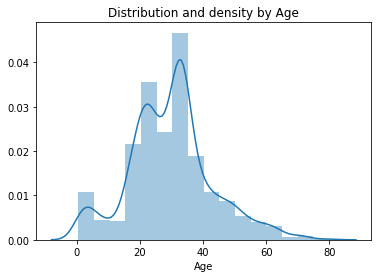

In [31]:
sns.distplot(titanic_df["Age"], bins=16)
plt.title("Distribution and density by Age")
plt.xlabel("Age")

In [32]:
# create Age bands
titanic_df['AgeBand'] = pd.cut(titanic_df['Age'], 5, labels=[1,2,3,4,5])
titanic_test['AgeBand'] = pd.cut(titanic_test['Age'], 5, labels=[1,2,3,4,5])
# create table of survival rates per age band
agedist_df = titanic_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

agedist_df

,AgeBand,Survived
0,1,0.548077
1,2,0.392670
2,3,0.320000
3,4,0.434783
4,5,0.090909


In [33]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,CabinLetter,Title,AgeBand
445,446,1,1,"Dodge, Master. Washington",0,4.00000,0,2,33638,81.8583,A34,0,2,A,4,1
209,210,1,1,"Blank, Mr. Henry",0,40.00000,0,0,112277,31.0000,A31,1,0,A,1,3
96,97,0,1,"Goldschmidt, Mr. George B",0,71.00000,0,0,PC 17754,34.6542,A5,1,0,A,1,5
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",0,49.00000,1,0,PC 17485,56.9292,A20,1,1,A,1,4
806,807,0,1,"Andrews, Mr. Thomas Jr",0,39.00000,0,0,112050,0.0000,A36,0,0,A,1,3
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",0,80.00000,0,0,27042,30.0000,A23,0,0,A,1,5
185,186,0,1,"Rood, Mr. Hugh Roscoe",0,32.89199,0,0,113767,50.0000,A32,0,0,A,1,3
867,868,0,1,"Roebling, Mr. Washington Augustus II",0,31.00000,0,0,PC 17590,50.4958,A24,0,0,A,1,2
284,285,0,1,"Smith, Mr. Richard William",0,32.89199,0,0,113056,26.0000,A19,0,0,A,1,3
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",1,48.00000,1,0,11755,39.6000,A16,1,1,A,3,3


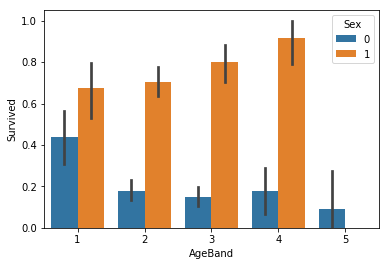

In [34]:
sns.barplot(x="AgeBand", y="Survived", hue="Sex", data=titanic_df);

#young males have best chance of survival among men
# older females have best chance of survival


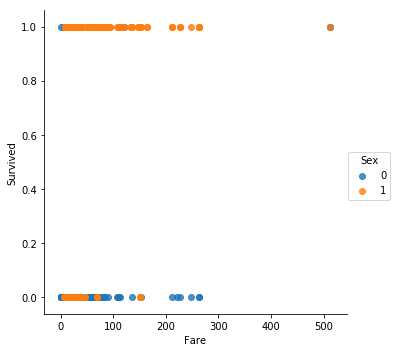

In [35]:
# Recommended way
sns.lmplot(x='Fare', y='Survived', hue='Sex',data=titanic_df, fit_reg=False)

In [36]:
#plot fare vs survival

#sns.pointplot(x="Fare", y="Survived", hue="Sex", data=titanic_df,
#palette={0: "blue", 1: "pink"},
#markers=["*", "o"], linestyles=["-", "--"]);

In [37]:
titanic_df.Fare.describe() 

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [38]:
#get average fare for each class
fare_avg_class_df = titanic_df[['Pclass' , 'Fare']].groupby(['Pclass']).mean()
fare_avg_class_df

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [39]:
#map the average fare based on pclass to the missing age values (nan)
fare_mapping = fare_avg_class_df.to_dict()
titanic_df['Fare'] = titanic_df['Fare'].fillna(titanic_df['Pclass'].map((fare_mapping['Fare'])))
titanic_test['Fare'] = titanic_test['Fare'].fillna(titanic_test['Pclass'].map((fare_mapping['Fare'])))
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,CabinLetter,Title,AgeBand
445,446,1,1,"Dodge, Master. Washington",0,4.0,0,2,33638,81.8583,A34,0,2,A,4,1
209,210,1,1,"Blank, Mr. Henry",0,40.0,0,0,112277,31.0000,A31,1,0,A,1,3
96,97,0,1,"Goldschmidt, Mr. George B",0,71.0,0,0,PC 17754,34.6542,A5,1,0,A,1,5


In [40]:
# create bands out of fare to simplify
# set bins to quartile
bins = (-1, 0, 8, 15, 31, 1000)

titanic_df['FareBand'] = pd.cut(titanic_df['Fare'], bins,labels=[1,2,3,4,5])
titanic_test['FareBand'] = pd.cut(titanic_test['Fare'], bins,labels=[1,2,3,4,5])
#titanic_df.head(50)
# create table of survival rates per age band
faredist_df = titanic_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)
faredist_df

,FareBand,Survived
0,1,0.066667
1,2,0.225664
2,3,0.285714
3,4,0.469194
4,5,0.581081


In [41]:
#titanic_train[
#titanic_train['FareBand' == 4]
# class distribution
print(titanic_df.groupby('FareBand').size())
#sns.distplot(titanic_train.FareBand)


FareBand
1     15
2    226
3    217
4    211
5    222
dtype: int64


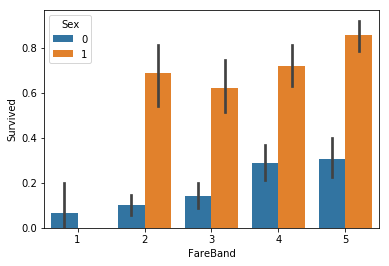

In [42]:
sns.barplot(x="FareBand", y="Survived", hue="Sex", data=titanic_df);

# first class have best chance of survival

In [43]:
#pd.scatter_matrix(titanic_train, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


In [44]:
#sns.pairplot(titanic_df, hue="Survived")

In [45]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.827062,0.523008,0.381594,32.204208,0.361392,0.904602,1.661055
std,257.353842,0.486592,0.836071,0.477990,13.290197,1.102743,0.806057,49.693429,0.635673,1.613459,0.935948
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,0.000000,21.845638,0.000000,0.000000,7.910400,0.000000,0.000000,1.000000
50%,446.000000,0.000000,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.873874,1.000000,0.000000,31.000000,1.000000,1.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,10.000000,5.000000


In [46]:
titanic_test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title,AgeBand,FareBand
311,1203,3,"Vartanian, Mr. David",0,22.000000,0,0,2658,7.2250,NaN,1,0,1.0,2,2
227,1119,3,"McNeill, Miss. Bridget",1,21.845638,0,0,370368,7.7500,NaN,2,0,2.0,2,2
53,945,1,"Fortune, Miss. Ethel Flora",1,28.000000,3,2,19950,263.0000,C23 C25 C27,0,5,2.0,2,5
97,989,3,"Makinen, Mr. Kalle Edvard",0,29.000000,0,0,STON/O 2. 3101268,7.9250,NaN,0,0,1.0,2,2
118,1010,1,"Beattie, Mr. Thomson",0,36.000000,0,0,13050,75.2417,C6,1,0,1.0,3,5
185,1077,2,"Maybery, Mr. Frank Hubert",0,40.000000,0,0,239059,16.0000,NaN,0,0,1.0,3,4
132,1024,3,"Lefebre, Mrs. Frank (Frances)",1,35.873874,0,4,4133,25.4667,NaN,0,4,3.0,3,4
373,1265,2,"Harbeck, Mr. William H",0,44.000000,0,0,248746,13.0000,NaN,0,0,1.0,3,3
265,1157,3,"Lyntakoff, Mr. Stanko",0,32.891990,0,0,349235,7.8958,NaN,0,0,1.0,3,2
116,1008,3,"Thomas, Mr. John",0,32.891990,0,0,2681,6.4375,NaN,1,0,1.0,3,2


In [47]:
# Now drop the columns we don't need to create our training nad test sets

#drop passengerid #drop Fare and Title
#drop age cabin embarked and name from data set used for training
# no longer dropping embark .drop('Embarked', axis=1)
titanic_train = titanic_df
titanic_train = titanic_df.drop('Ticket',axis=1).drop('Name', axis=1).drop('Age',axis=1).drop('Cabin',axis=1)
titanic_train = titanic_train.drop('Fare', axis=1).drop('Title', axis=1).drop('SibSp',axis=1).drop('Parch',axis=1).drop('CabinLetter',axis=1)
#drop('PassengerId', axis=1).
titanic_test = titanic_test.drop('Ticket',axis=1).drop('Name', axis=1).drop('Age',axis=1).drop('Cabin',axis=1)
titanic_test = titanic_test.drop('Fare', axis=1).drop('Title', axis=1).drop('SibSp',axis=1).drop('Parch',axis=1)

titanic_train.head(10)

,PassengerId,Survived,Pclass,Sex,Embarked,FamilySize,AgeBand,FareBand
445,446,1,1,0,0,2,1,5
209,210,1,1,0,1,0,3,4
96,97,0,1,0,1,0,5,5
599,600,1,1,0,1,1,4,5
806,807,0,1,0,0,0,3,1
630,631,1,1,0,0,0,5,4
185,186,0,1,0,0,0,3,5
867,868,0,1,0,0,0,2,5
284,285,0,1,0,0,0,3,4
556,557,1,1,1,1,1,3,5


In [48]:
#now ready to run tests
# check for any nulls
nans = lambda titanic_test: titanic_test[titanic_test.isnull().any(axis=1)]
nans(titanic_test)

,PassengerId,Pclass,Sex,Embarked,FamilySize,AgeBand,FareBand


In [49]:
# create Y array and X array
y_vals = titanic_train['Survived']
titanic_train = titanic_train.drop('Survived', axis=1)
#y_vals.head(10)



In [50]:
# we also need to preserve the passenger id so can submit the preditions
PassengerId_train = titanic_train['PassengerId']
titanic_train.drop('PassengerId', axis=1, inplace=True)

PassengerId_test =  titanic_test['PassengerId']
titanic_test.drop('PassengerId', axis=1, inplace=True)

In [51]:
import matplotlib.pyplot as plt
# plotting a scatter matrix
from matplotlib import cm

#X = fruits[['height', 'width', 'mass', 'color_score']]
#y = fruits['fruit_label']
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
#scatter = pd.scatter_matrix(titanic_train, c= y_vals, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

In [52]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(titanic_train, y_vals, random_state=0)

In [53]:
from sklearn.neighbors import KNeighborsClassifier

# K controls how many nearest neighbours model tries to match with
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.81165919282511212

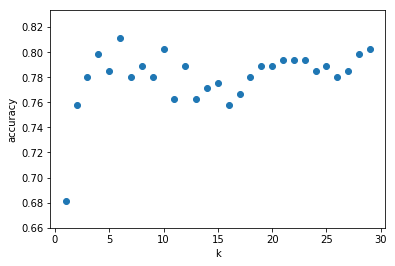

In [54]:
#impact of changes to K
k_range = range(1,30)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20,25,30]);

# best accuracy is around k=6

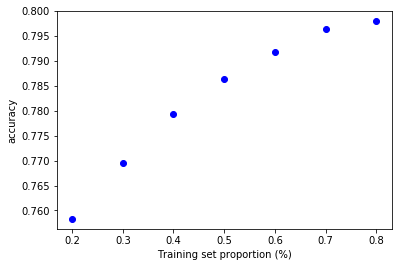

In [55]:
#impact of train test split proportion
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 6)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = model_selection.train_test_split(titanic_train, y_vals, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');
# in this case, more data improves accuracy

In [56]:
# since this model does better on larger data, let's train on 100% of the training data for submissions
# K controls how many nearest neighbours model tries to match with
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(titanic_train, y_vals)
y_predict = knn.predict(titanic_test.values)
#SHIFT TAB

In [59]:
# test minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(titanic_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(titanic_test)

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train_scaled, y_vals)
y_predict = knn.predict(X_test_scaled)

In [60]:
titanic_test['PassengerID'] = PassengerId_test
titanic_test['Survived'] = pd.Series(y_predict)
titanic_test.to_csv("C:/Users/blahjays/Documents/MachineLearning/Kaggle/knnoutput_scaled.csv", index=False)

In [54]:
# let's submit these results
#y_predict = svc.predict(titanic_test.values)
# add survival predictions back into Dataset and then save to CSV
#titanic_test['PassengerID'] = PassengerId_test
#titanic_test['Survived'] = pd.Series(y_predict)
#titanic_test.to_csv("C:/Users/blahjays/Documents/MachineLearning/Kaggle/svcoutput_withembark.csv", index=False)

In [55]:
# add survival predictions back into Dataset and then save to CSV
#titanic_test['PassengerID'] = PassengerId_test
#titanic_test['Survived'] = pd.Series(y_predict)
#titanic_test.to_csv("C:/Users/blahjays/Documents/MachineLearning/Kaggle/svcoutput.csv", index=False)

0.77777777777777779

In [58]:
# predict survival for our test data
#y_predict = model.predict(titanic_test.values)
#titanic_test['PassengerID'] = PassengerId_test
#titanic_test['Survived'] = pd.Series(y_predict)
#titanic_test.to_csv("C:/Users/blahjays/Documents/MachineLearning/Kaggle/naivebayes.csv", index=False)